In [1]:
import pandas as pd

In [2]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx'

In [5]:
df = pd.read_excel(url, sheet_name= 'Canada by Citizenship', skiprows=range(20), skipfooter=2)

In [6]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [10]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df.set_index('Country', inplace=True)

# add total column
df['Total'] = df.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df.shape)

data dimensions: (195, 38)


In [19]:
df_india = df.loc['India', years]

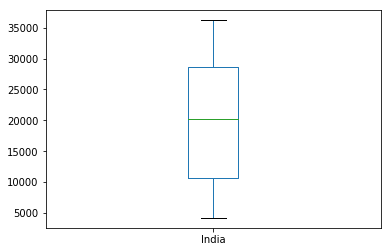

In [20]:
df_india.plot(kind="box")

In [22]:
df_india.min()

4211

In [23]:
df_india.max()

36210

In [24]:
df_india.median()

20235.0

In [28]:
indo_china = df.loc[['India', 'China'], years].T

In [29]:
indo_china

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527
1985,4211,1816
1986,7150,1960
1987,10189,2643
1988,11522,2758
1989,10343,4323


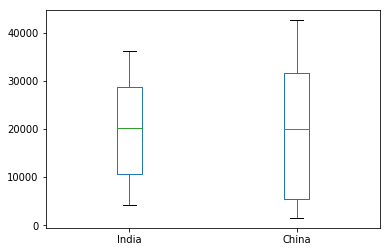

In [30]:
indo_china.plot(kind="box")

# Scatter Plot

In [32]:
df_india.plot(kind="scatter")

ValueError: plot kind scatter can only be used for data frames

In [37]:
india_df = pd.DataFrame(df_india)
india_df.reset_index(inplace=True)
india_df.rename(columns={'index' : 'Years'}, inplace=True)

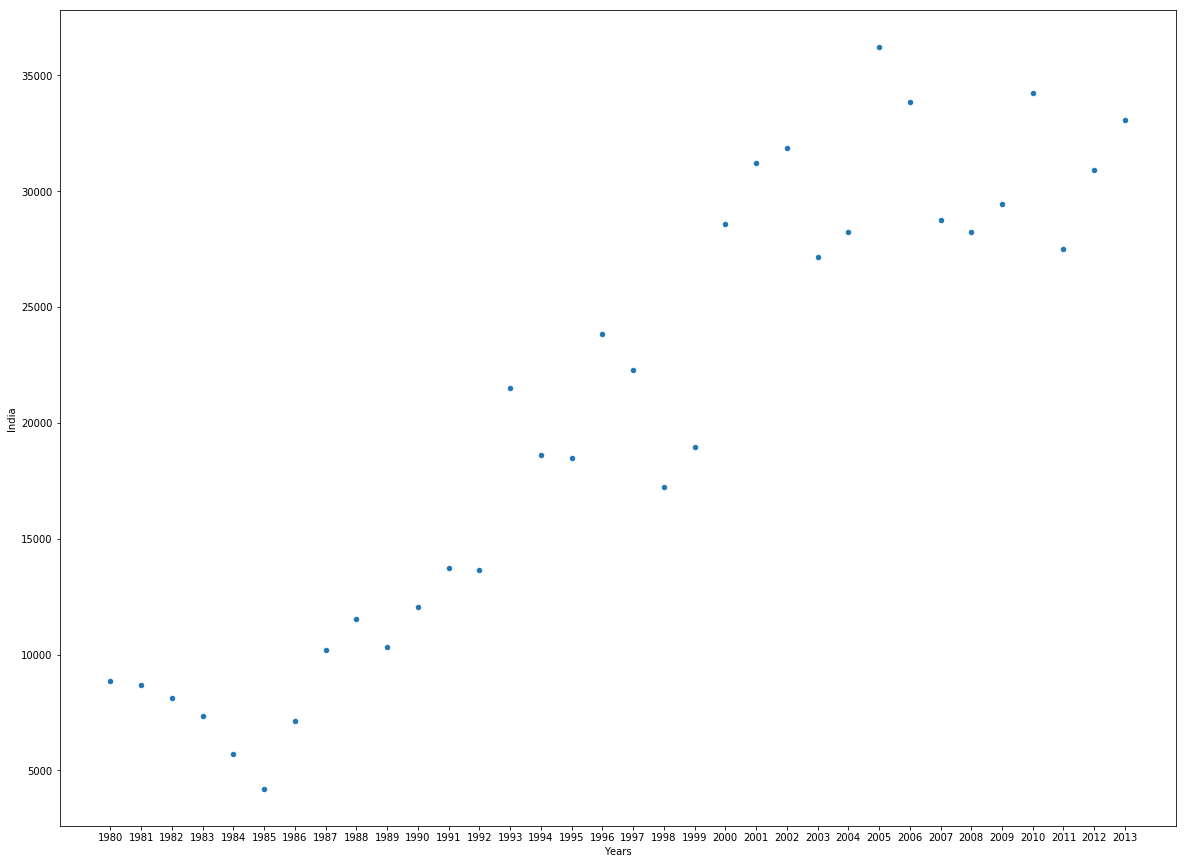

In [41]:
india_df.plot(kind="scatter", x = "Years", y = "India", figsize=[20, 15])

In [42]:
china_df = pd.DataFrame(df.loc['China', years])
china_df.reset_index(inplace=True)
china_df.rename(columns={'index' : 'Years'}, inplace=True)

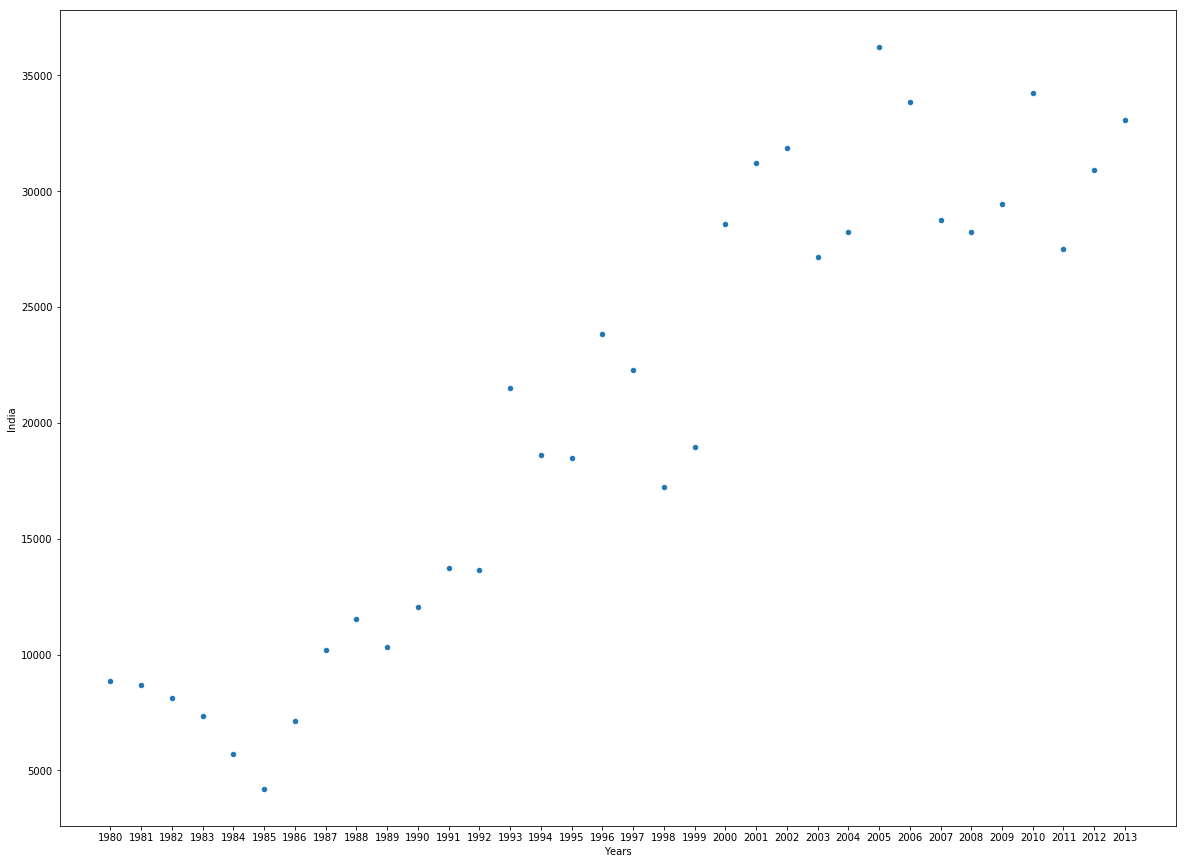

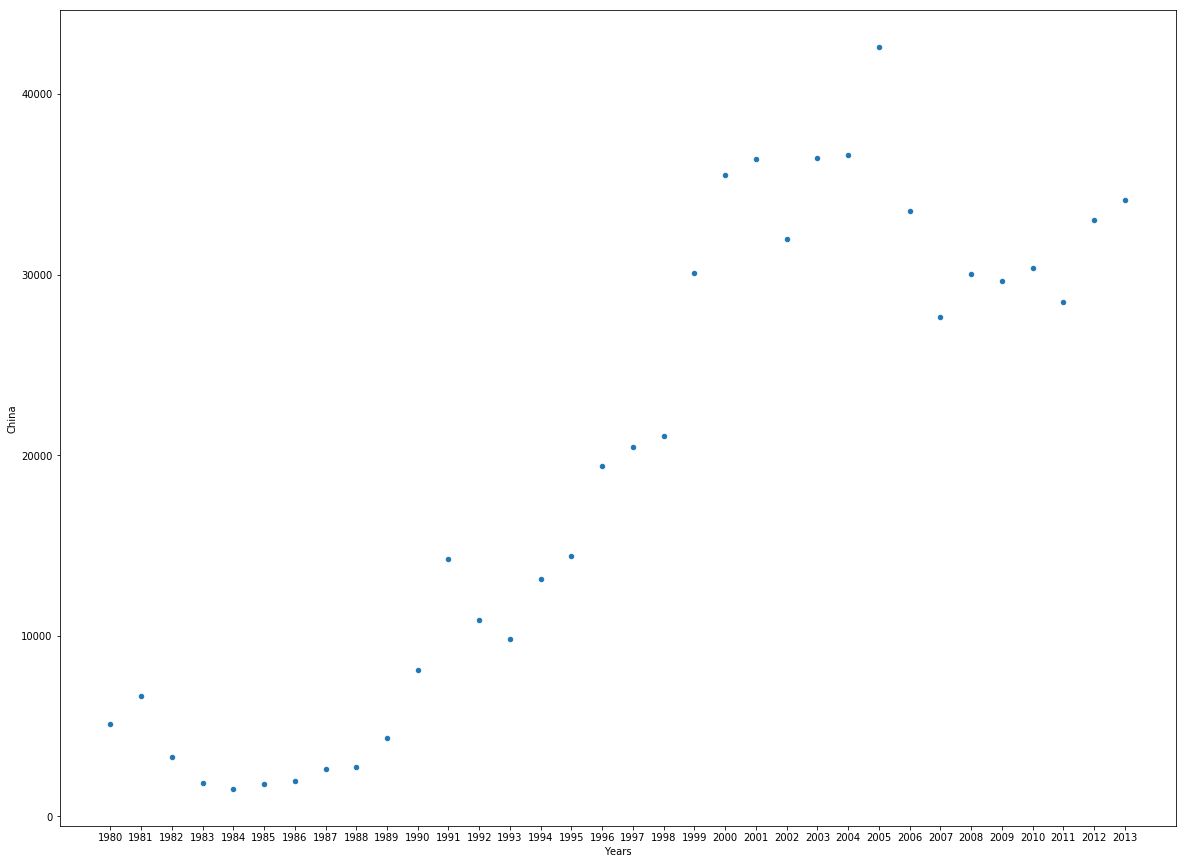

In [44]:
india_df.plot(kind="scatter", x = "Years", y = "India", figsize=[20, 15])
china_df.plot(kind="scatter", x = "Years", y = "China", figsize=[20, 15])